In [4]:
import numpy as numpy
import pandas as pd 
import scanpy as sc

In [5]:
sc.settings.verbosity = 4 
sc.logging.print_header()
sc.settings.set_figure_params(dpi=60, facecolor='white')

/Users/newsroom/opt/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.21.6 scipy==1.8.1 pandas==1.4.2 scikit-learn==1.1.0 statsmodels==0.13.2 pynndescent==0.5.7


In [7]:
results_file = 'write/kidney2.h5ad'

In [8]:
adata=sc.read_h5ad("human-other-kidney2_normal.h5ad")
adata

AnnData object with n_obs × n_vars = 23065 × 24135
    obs: 'batch', 'barcodes', 'cluster', 'cell_type', 'cell_type2', 'pca1', 'pca2', 'umap1', 'umap2', 'scale'
    var: 'featureid', 'featuretype', 'n_cells', 'percent_cells', 'robust', 'highly_variable_features'
    uns: 'genome', 'modality', 'norm_count'

normalizing counts per cell
    finished (0:00:00)


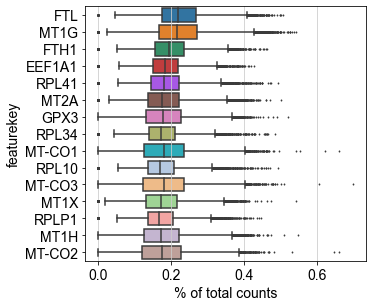

In [9]:
sc.pl.highest_expr_genes(adata, n_top=15)

In [10]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 4093 genes that are detected in less than 3 cells


In [12]:
# PREPROCESSING
adata.var['mt'] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)